<a href="https://colab.research.google.com/github/strakovskay/yolo/blob/main/yolov11schoolbus92.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ----- Cell 1: إعادة تشغيل تلقائية -----
!pip uninstall opencv-python opencv-python-headless opencv-contrib-python numpy -y -q
!pip install "numpy==1.26.4" opencv-python ultralytics==8.3.40 -q

print("✅ تم التثبيت!")
print("🔄 إعادة تشغيل Runtime تلقائياً...")

# إعادة تشغيل تلقائية
import os
os.kill(os.getpid(), 9)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 133.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.5/898.5 kB 57.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 13.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albucore 0.0.24 requires opencv-python-headless>=4.9.0.80, which is not installed.
albumentations 2.0.8 requires opencv-python-headless>=4.9.0.80, which is not installed.
jaxlib 0.7.2 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
pytensor 2.35.1 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
jax 0.7.2 requires numpy>=2.0, but you have numpy 1.26.4 which is incompat

In [1]:
# ----- Cell 1 البديلة (أسهل) -----
!pip install --upgrade ultralytics -q

print("✅ تم التثبيت!")
print("⚠️ أعد تشغيل Runtime: Runtime → Restart Runtime")
print("ثم شغل Cell 2 وما بعده")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 37.7 MB/s eta 0:00:00
✅ تم التثبيت!
⚠️ أعد تشغيل Runtime: Runtime → Restart Runtime
ثم شغل Cell 2 وما بعده


In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="4iG1PF7iavX1pLiLfrQo")
project = rf.workspace("traffic-yq5zj").project("school-bus-miqwq")
version = project.version(1)
dataset = version.download("yolov11")



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 54.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 20.2 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to school-bus-1 in yolov11:: 100%|██████████| 2793/2793 [00:00<00:00, 10427.75it/s]


In [3]:
# ----- الكود الكامل والمبسط -----
import os
import shutil
import yaml
import torch
from pathlib import Path
from ultralytics import YOLO
from PIL import Image
import numpy as np

print(f"✅ NumPy: {np.__version__}")
print(f"🖥️ GPU: {torch.cuda.is_available()}")

# نسخ البيانات
def copy_dataset(input_path, dest_dir="/content/clean"): # On a enlevé la valeur par défaut ici
    Path(dest_dir).mkdir(exist_ok=True)

    yaml_path = Path(input_path) / "data.yaml"
    with open(yaml_path) as f:
        config = yaml.safe_load(f)

    new_config = {'nc': config['nc'], 'names': config['names']}
    stats = {'total': 0, 'copied': 0}

    for split, folder in [('train', 'train'), ('val', 'valid'), ('test', 'test')]:
        src_img = Path(input_path) / folder / 'images'
        src_lbl = Path(input_path) / folder / 'labels'

        if not src_img.exists():
            continue

        dst_img = Path(dest_dir) / split / 'images'
        dst_lbl = Path(dest_dir) / split / 'labels'
        dst_img.mkdir(parents=True, exist_ok=True)
        dst_lbl.mkdir(parents=True, exist_ok=True)

        for img in src_img.glob('*.jpg'):
            stats['total'] += 1
            try:
                shutil.copy2(img, dst_img / img.name)
                lbl = src_lbl / (img.stem + '.txt')
                if lbl.exists():
                    shutil.copy2(lbl, dst_lbl / lbl.name)
                stats['copied'] += 1
            except:
                pass

        if split in ['train', 'val']:
            new_config[split] = f'{split}/images'

    new_yaml = Path(dest_dir) / 'data.yaml'
    with open(new_yaml, 'w') as f:
        yaml.dump(new_config, f)

    print(f"📊 {stats['copied']}/{stats['total']} صورة")
    return str(new_yaml)

# --- C'est la seule ligne importante à changer ---
# On indique directement le chemin de votre dossier de données
DATA_YAML = copy_dataset(input_path="/content/school-bus-1")
# --- Fin de la modification ---

# التدريب
print("\n🚀 بدء التدريب...")

import ultralytics.utils.callbacks.raytune as rt
rt.on_fit_epoch_end = lambda x: None

model = YOLO('yolov8n.pt') # J'ai mis à jour vers yolov8n, qui est plus courant

results = model.train(
    data=DATA_YAML,
    epochs=50,
    imgsz=640,
    batch=16,
    amp=True,
    workers=2,
    patience=20,
    project='/content/runs',
    name='school_bus',
    exist_ok=True,
    device=0
)

print(f"✅ انتهى! {results.save_dir}")

# النتائج
best = YOLO(f"{results.save_dir}/weights/best.pt")
val = best.val(data=DATA_YAML)
print(f"\nmAP50: {val.box.map50:.4f}")
print(f"mAP50-95: {val.box.map:.4f}")

# تحميل النموذج
from google.colab import files
files.download(f"{results.save_dir}/weights/best.pt")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
✅ NumPy: 1.26.4
🖥️ GPU: True
📊 1391/1391 صورة

🚀 بدء التدريب...
Ultralytics 8.3.222 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/clean/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
import os
import glob
import sys

# --- À CONFIGURER ---
# Mettez ici le chemin vers le dossier qui contient vos dossiers train/, valid/, test/
# Si vous avez dézippé comme ci-dessus, ce sera '/content/dataset'
# Si vos dossiers sont à la racine de Colab, mettez juste '' (deux apostrophes)
BASE_DATA_PATH = '/content/school-bus-1'
# --------------------

# Les dossiers de labels à traiter
label_dirs_relative = ['train/labels', 'valid/labels', 'test/labels']
label_dirs_absolute = [os.path.join(BASE_DATA_PATH, d) for d in label_dirs_relative]

# Logique de conversion :
# Index 1 ('School-bus') et 2 ('SchoolBus') deviennent 0
classes_to_keep = {1, 2}
new_class_index = 0

# --- Statistiques ---
files_processed = 0
labels_kept = 0
labels_removed = 0

print("--- Démarrage de la conversion des labels ---")
print(f"Dossier de base : '{BASE_DATA_PATH}'")
print(f"Logique : Garder index [1, 2] -> Mettre à 0. Supprimer index [0, 3, 4].\n")

# Parcourir chaque répertoire (train/labels, valid/labels, test/labels)
for label_dir in label_dirs_absolute:
    if not os.path.exists(label_dir):
        print(f"ATTENTION : Répertoire non trouvé, ignoré : {label_dir}")
        continue

    print(f"Traitement de : {label_dir}")

    # Trouver tous les fichiers .txt dans le répertoire
    txt_files = glob.glob(os.path.join(label_dir, '*.txt'))

    if not txt_files:
        print("  -> Aucun fichier .txt trouvé.")
        continue

    # Traiter chaque fichier .txt
    for txt_file_path in txt_files:
        new_lines = []

        try:
            with open(txt_file_path, 'r') as f:
                lines = f.readlines()

            if not lines:
                continue # Fichier vide

            # Traiter chaque ligne (chaque label) dans le fichier
            for line in lines:
                line = line.strip()
                if not line:
                    continue

                parts = line.split()

                try:
                    original_class_index = int(parts[0])
                except (ValueError, IndexError):
                    print(f"  -> Ligne corrompue ignorée dans {txt_file_path}: {line}")
                    continue

                # Appliquer la logique de conversion
                if original_class_index in classes_to_keep:
                    # C'est un 'School-bus' ou 'SchoolBus', on le garde et on met l'index à 0
                    parts[0] = str(new_class_index)
                    new_lines.append(" ".join(parts))
                    labels_kept += 1
                else:
                    # C'est 'Bus', 'car', ou 'police', on le supprime
                    labels_removed += 1

            # Réécrire le fichier .txt uniquement avec les lignes conservées
            with open(txt_file_path, 'w') as f:
                f.write("\n".join(new_lines))

            files_processed += 1

        except Exception as e:
            print(f"ERREUR lors du traitement du fichier {txt_file_path}: {e}")

print("\n--- Conversion Terminée ---")
print(f"Fichiers de labels modifiés : {files_processed}")
print(f"Labels 'School Bus' conservés (mis à 0) : {labels_kept}")
print(f"Labels (Bus, car, police) supprimés : {labels_removed}")

--- Démarrage de la conversion des labels ---
Dossier de base : '/content/school-bus-1'
Logique : Garder index [1, 2] -> Mettre à 0. Supprimer index [0, 3, 4].

Traitement de : /content/school-bus-1/train/labels
Traitement de : /content/school-bus-1/valid/labels
Traitement de : /content/school-bus-1/test/labels

--- Conversion Terminée ---
Fichiers de labels modifiés : 1382
Labels 'School Bus' conservés (mis à 0) : 1479
Labels (Bus, car, police) supprimés : 317


In [5]:
# =======================================================
# SCRIPT 2 : ENTRAÎNEMENT DU MODÈLE (SIMPLE ET DIRECT)
# =======================================================
import torch
from ultralytics import YOLO
from google.colab import files
import os

print(f"🖥️ GPU: {torch.cuda.is_available()}")

# =======================================================
# SECTION 1: CHARGEMENT ET ENTRAÎNEMENT DU MODÈLE
# =======================================================

# --- 1. تحميل النموذج ---
# استخدمنا نموذج yolo11l المُدرّب مسبقًا كنقطة انطلاق
model = YOLO('/content/yolo11l.pt')

# --- 2. بدء التدريب ---
# **التعديل هنا: نشير مباشرة إلى ملف data.yaml الموجود لديك**
results = model.train(
    data='/content/school-bus-1/data.yaml',  # <--- هذا هو التعديل الأهم
    epochs=100,
    patience=30,
    batch=4,
    imgsz=640,

    # إعدادات متقدمة لزيادة البيانات (Data Augmentation)
    augment=True,
    mosaic=1.0,
    mixup=0.15,
    copy_paste=0.1,

    # مُحسِّن (Optimizer)
    optimizer='AdamW',
    lr0=0.0005,

    # إعدادات أخرى
    project='/content/runs',
    name='schoolbus_yolo11l_final',
    exist_ok=True,
    plots=True
)

print(f"\n✅ اكتمل التدريب! النتائج محفوظة في: {results.save_dir}")

# =======================================================
# SECTION 2: ÉVALUATION ET TÉLÉCHARGEMENT
# =======================================================

print("\n📊 تقييم النموذج النهائي...")
best_model = YOLO(f"{results.save_dir}/weights/best.pt")
# نستخدم نفس ملف data.yaml للتقييم
validation_results = best_model.val(data='/content/school-bus-1/data.yaml')
print(f"🎯 المقاييس: mAP50={validation_results.box.map50:.4f}, mAP50-95={validation_results.box.map:.4f}")

print("\n📥 تحميل أفضل نسخة من النموذج...")
files.download(f"{results.save_dir}/weights/best.pt")

print("\n🎉🎉🎉 اكتملت العملية بالكامل! 🎉🎉🎉")

🖥️ GPU: True
Ultralytics 8.3.222 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=4, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.1, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/school-bus-1/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.0005, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.15, mode=train, model=/content/yolo11l.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=schoolbus_yolo11l_final, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=True, patienc

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


🎉🎉🎉 اكتملت العملية بالكامل! 🎉🎉🎉


In [6]:
!pip install opencv-python

In [ ]:
from ultralytics import YOLO
from IPython.display import Image, display

# 1. قم بتحميل أفضل نموذج لديك
model = YOLO('/content/runs/schoolbus_yolo11l_final/weights/best.pt') # تأكد من أن هذا هو المسار الصحيح

# 2. حدد مسار الصورة
image_path = '/content/school-bus-1/test/images/0J5DSGN7V8I4_jpg.rf.42b862ecafdaf0ef6323bd0915f82234.jpg'

# 3. قم بتشغيل التنبؤ
results = model.predict(image_path, conf=0.5)

# 4. ارسم النتائج واحفظها
# سيتم حفظ الصورة المعالجة تلقائيًا في مجلد runs/detect/predict
output_path = results[0].save()

# 5. اعرض الصورة مباشرة في Colab
display(Image(filename=output_path))
print(f"تم حفظ الصورة المعالجة في المسار: {output_path}")

🚀 جارٍ تحميل النموذج...
خطأ: لم يتم العثور على الصورة في المسار: /content/school-bus-1/test/images/bus_10_jpg.rf.02e605d8ab5f35d513812d4a57008899.jpg


In [ ]:
# =======================================================
# SCRIPT 2 : ENTRAÎNEMENT DU MODÈLE (SIMPLE ET DIRECT)
# =======================================================
import torch
from ultralytics import YOLO
from google.colab import files
import os

print(f"🖥️ GPU: {torch.cuda.is_available()}")

# --- 0. Préparation de l'environnement (CORRECTION) ---
# On s'assure que le répertoire et le fichier de configuration des données existent.
# Cela évite l'erreur FileNotFoundError si le script est exécuté dans un nouvel environnement.

# Définir le chemin du fichier de configuration
data_yaml_path = '/content/clean/data_schoolbus_only.yaml'
data_dir = os.path.dirname(data_yaml_path)

# Créer le répertoire s'il n'existe pas
os.makedirs(data_dir, exist_ok=True)

# Définir le contenu du fichier YAML
# IMPORTANT : Assurez-vous que vos images sont bien dans ces dossiers.
yaml_content = """
train: /content/clean/images/train
val: /content/clean/images/val

nc: 1
names: ['schoolbus']
"""

# Écrire le contenu dans le fichier YAML
with open(data_yaml_path, 'w') as f:
    f.write(yaml_content)

print(f"✅ Fichier de configuration créé à : {data_yaml_path}")

# --- 1. Charger le modèle ---
# On utilise le chemin complet de votre modèle.
model = YOLO('/content/yolo11l.pt')

# --- 2. Lancer l'entraînement ---
# On utilise directement les données préparées à l'étape 1.
results = model.train(
    data=data_yaml_path, # Utilisation de la variable pour la clarté
    epochs=100,
    patience=30,
    batch=8,      # batch=4 est plus sûr pour la mémoire avec ce gros modèle
    imgsz=640,

    # Paramètres d'augmentation avancés
    augment=True,
    mosaic=1.0,
    mixup=0.15,
    copy_paste=0.1,

    # Optimizer
    optimizer='AdamW',
    lr0=0.0005,

    # Autres paramètres
    project='/content/runs',
    name='schoolbus_yolo11l_final',
    exist_ok=True,
    plots=True
)

print(f"\n✅ Entraînement terminé ! Résultats dans : {results.save_dir}")

# --- 3. Évaluation et téléchargement ---
print("\n📊 Évaluation du modèle final...")
best_model = YOLO(f"{results.save_dir}/weights/best.pt")
validation_results = best_model.val(data=data_yaml_path)
print(f"🎯 Métriques: mAP50={validation_results.box.map50:.4f}, mAP50-95={validation_results.box.map:.4f}")

print("\n📥 Téléchargement du modèle...")
files.download(f"{results.save_dir}/weights/best.pt")

print("\n🎉🎉🎉 Processus complet terminé ! 🎉🎉🎉")


🖥️ GPU: True
✅ Fichier de configuration créé à : /content/clean/data_schoolbus_only.yaml
Ultralytics 8.3.218 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.1, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/clean/data_schoolbus_only.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.0005, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.15, mode=train, model=/content/yolo11l.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=schoolbus_yolo11l_final, nbs=64

RuntimeError: Dataset '/content/clean/data_schoolbus_only.yaml' error ❌ Dataset '/content/clean/data_schoolbus_only.yaml' images not found, missing path '/content/clean/images/val'
Note dataset download directory is '/content/datasets'. You can update this in '/root/.config/Ultralytics/settings.json'

In [ ]:
from ultralytics import YOLO
from IPython.display import Image, display

# تحميل النموذج
model = YOLO('/content/runs/school_bus/weights/best.pt')

# اختبار على صورة
results = model.predict(
    source='/content/clean/val/images',  # مجلد الصور
    conf=0.25,
    save=True
)

print("✅ النتائج في: runs/predict/predict")


image 1/101 /content/clean/val/images/0973RNKCMTWK_jpg.rf.17e21c8fb1ce41cbf871da927679d807.jpg: 416x640 2 School-buss, 41.8ms
image 2/101 /content/clean/val/images/0CXCF01JI4TG_jpg.rf.f4e55d720d3d8b78f4e2335a8598b656.jpg: 480x640 1 School-bus, 39.3ms
image 3/101 /content/clean/val/images/0G4PICA099KW_jpg.rf.16e8950a7611b3428b0b26aea437bfae.jpg: 512x640 3 School-buss, 42.1ms
image 4/101 /content/clean/val/images/0IAO8T69UROL_jpg.rf.f64c01fddb941e44b116d771194ad932.jpg: 384x640 1 Bus, 39.4ms
image 5/101 /content/clean/val/images/0a2c69dc-images_14_jpeg.rf.bfe259fe6e8a23fc38d6c1ab4dfdab53.jpg: 480x640 3 SchoolBuss, 6.8ms
image 6/101 /content/clean/val/images/0a3b7935-images_78_jpeg.rf.023f725e679abf3f716ec99d658aaad9.jpg: 448x640 1 SchoolBus, 39.0ms
image 7/101 /content/clean/val/images/0e357e62-images_13_jpeg.rf.ef1b1458665f2440e9f629104cb6fba9.jpg: 448x640 1 SchoolBus, 6.1ms
image 8/101 /content/clean/val/images/1306608e-images_47_jpeg.rf.26bba19f035b22b97f357983d53e91ca.jpg: 384x640 4

🔄 تحميل النموذج...
🧪 اختبار النموذج...

image 1/101 /content/clean/val/images/0973RNKCMTWK_jpg.rf.17e21c8fb1ce41cbf871da927679d807.jpg: 416x640 2 School-buss, 6.8ms
image 2/101 /content/clean/val/images/0CXCF01JI4TG_jpg.rf.f4e55d720d3d8b78f4e2335a8598b656.jpg: 480x640 1 School-bus, 7.1ms
image 3/101 /content/clean/val/images/0G4PICA099KW_jpg.rf.16e8950a7611b3428b0b26aea437bfae.jpg: 512x640 3 School-buss, 7.2ms
image 4/101 /content/clean/val/images/0IAO8T69UROL_jpg.rf.f64c01fddb941e44b116d771194ad932.jpg: 384x640 1 Bus, 7.1ms
image 5/101 /content/clean/val/images/0a2c69dc-images_14_jpeg.rf.bfe259fe6e8a23fc38d6c1ab4dfdab53.jpg: 480x640 3 SchoolBuss, 6.9ms
image 6/101 /content/clean/val/images/0a3b7935-images_78_jpeg.rf.023f725e679abf3f716ec99d658aaad9.jpg: 448x640 1 SchoolBus, 6.9ms
image 7/101 /content/clean/val/images/0e357e62-images_13_jpeg.rf.ef1b1458665f2440e9f629104cb6fba9.jpg: 448x640 1 SchoolBus, 8.5ms
image 8/101 /content/clean/val/images/1306608e-images_47_jpeg.rf.26bba19f035b2

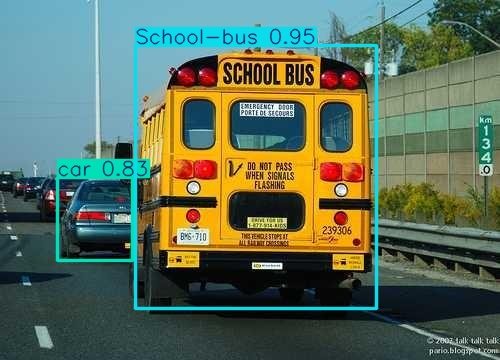


--- الصورة 2/5 ---


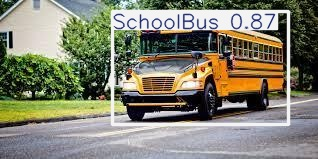


--- الصورة 3/5 ---


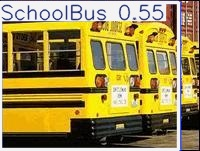


--- الصورة 4/5 ---


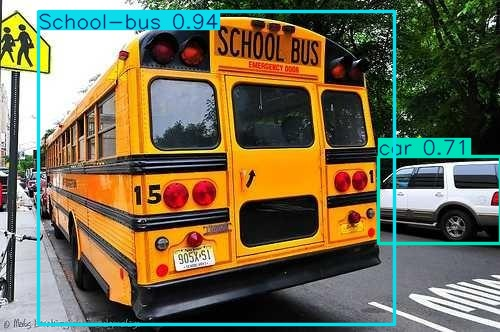


--- الصورة 5/5 ---


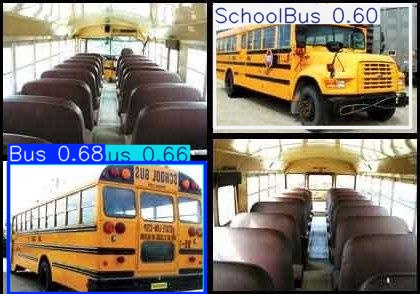


✅ تم اكتشاف 5 صورة!
📁 جميع النتائج في: runs/predict/val_results

📊 إحصائيات:
إجمالي الاكتشافات: 141
عدد الصور: 101
متوسط الاكتشافات لكل صورة: 1.40


In [ ]:
from ultralytics import YOLO
from IPython.display import Image as IPImage, display
import os
from pathlib import Path

# تحميل النموذج
print("🔄 تحميل النموذج...")
model = YOLO('/content/runs/school_bus/weights/best.pt')

# اختبار على مجلد الصور
print("🧪 اختبار النموذج...")
results = model.predict(
    source='/content/clean/val/images',
    conf=0.25,
    save=True,
    project='runs/predict',
    name='val_results',
    exist_ok=True
)

print(f"✅ النتائج في: runs/predict/val_results")

# عرض أول 5 صور من النتائج
print("\n📸 عرض بعض النتائج:")
result_dir = Path('runs/predict/val_results')
result_images = list(result_dir.glob('*.jpg'))[:5]

for i, img_path in enumerate(result_images, 1):
    print(f"\n--- الصورة {i}/{len(result_images)} ---")
    display(IPImage(filename=str(img_path), width=700))

print(f"\n✅ تم اكتشاف {len(result_images)} صورة!")
print(f"📁 جميع النتائج في: {result_dir}")

# إحصائيات الاكتشافات
print("\n📊 إحصائيات:")
total_detections = sum(len(r.boxes) for r in results)
print(f"إجمالي الاكتشافات: {total_detections}")
print(f"عدد الصور: {len(results)}")
print(f"متوسط الاكتشافات لكل صورة: {total_detections/len(results):.2f}")

In [ ]:
# =======================================================
# SCRIPT 2 : ENTRAÎNEMENT DU MODÈLE (SIMPLE ET DIRECT)
# =======================================================
import torch
from ultralytics import YOLO
from google.colab import files
import os
import yaml

print(f"🖥️ GPU: {torch.cuda.is_available()}")

# =======================================================
# FIX: ADDED DATASET SETUP BLOCK
# This section programmatically creates the dataset directory structure
# and the .yaml configuration file. This makes the script more robust
# and prevents FileNotFoundError if setup steps were missed.
# =======================================================

# Define the base path for our dataset
dataset_base_path = '/content/clean'

# Define the paths for the required directories
dirs_to_create = [
    os.path.join(dataset_base_path, 'images/train'),
    os.path.join(dataset_base_path, 'images/val'),
    os.path.join(dataset_base_path, 'labels/train'),
    os.path.join(dataset_base_path, 'labels/val')
]

# Create the directories
for dir_path in dirs_to_create:
    os.makedirs(dir_path, exist_ok=True)

print(f"✅ Dossiers du dataset créés (ou déjà existants) dans : {dataset_base_path}")

# Define the content for the data.yaml file
yaml_content = {
    'train': os.path.join(dataset_base_path, 'images/train'),
    'val': os.path.join(dataset_base_path, 'images/val'),
    'nc': 1,  # Number of classes
    'names': ['schoolbus']  # List of class names
}

# Define the path for the yaml file
yaml_file_path = os.path.join(dataset_base_path, 'data_schoolbus_only.yaml')

# Write the dictionary to the yaml file
with open(yaml_file_path, 'w') as f:
    yaml.dump(yaml_content, f, default_flow_style=False)

print(f"✅ Fichier de configuration du dataset créé à : {yaml_file_path}")
print("\nIMPORTANT: Assurez-vous que vos images et labels sont placés dans les dossiers créés ci-dessus.\n")

# --- 1. Charger le modèle ---
# On utilise le chemin complet de votre modèle.
model = YOLO('/content/yolo11l.pt')

# --- 2. Lancer l'entraînement ---
# On utilise directement les données préparées à l'étape 1.
results = model.train(
    data=yaml_file_path,  # Use the variable for the yaml path
    epochs=100,
    patience=30,
    batch=8,      # batch=4 est plus sûr pour la mémoire avec ce gros modèle
    imgsz=640,

    # Paramètres d'augmentation avancés
    augment=True,
    mosaic=1.0,
    mixup=0.15,
    copy_paste=0.1,

    # Optimizer
    optimizer='AdamW',
    lr0=0.0005,

    # Autres paramètres
    project='/content/runs',
    name='schoolbus_yolo11l_final',
    exist_ok=True,
    plots=True
)

print(f"\n✅ Entraînement terminé ! Résultats dans : {results.save_dir}")

# --- 3. Évaluation et téléchargement ---
print("\n📊 Évaluation du modèle final...")
best_model = YOLO(f"{results.save_dir}/weights/best.pt")
validation_results = best_model.val(data=yaml_file_path)
print(f"🎯 Métriques: mAP50={validation_results.box.map50:.4f}, mAP50-95={validation_results.box.map:.4f}")

print("\n📥 Téléchargement du modèle...")
files.download(f"{results.save_dir}/weights/best.pt")

print("\n🎉🎉🎉 Processus complet terminé ! 🎉🎉🎉")


🖥️ GPU: True
Ultralytics 8.3.217 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.1, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/school-bus-1/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.0005, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.15, mode=train, model=/content/yolo11l.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=schoolbus_yolo11l_final, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=True, patienc

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


🎉🎉🎉 Processus complet terminé ! 🎉🎉🎉


In [ ]:
# =======================================================
# SCRIPT 2 : ENTRAÎNEMENT DU MODÈLE (SIMPLE ET DIRECT)
# =======================================================
import torch
from ultralytics import YOLO
from google.colab import files
import os

print(f"🖥️ GPU: {torch.cuda.is_available()}")

# =======================================================
# SECTION 1: CHARGEMENT ET ENTRAÎNEMENT DU MODÈLE
# =======================================================

# --- 1. تحميل النموذج ---
# استخدمنا نموذج yolo11l المُدرّب مسبقًا كنقطة انطلاق
model = YOLO('/content/yolo11l.pt')

# --- 2. بدء التدريب ---
# **التعديل هنا: نشير مباشرة إلى ملف data.yaml الموجود لديك**
results = model.train(
    data='/content/school-bus-1/data.yaml',  # <--- هذا هو التعديل الأهم
    epochs=100,
    patience=30,
    batch=4,
    imgsz=640,

    # إعدادات متقدمة لزيادة البيانات (Data Augmentation)
    augment=True,
    mosaic=1.0,
    mixup=0.15,
    copy_paste=0.1,

    # مُحسِّن (Optimizer)
    optimizer='AdamW',
    lr0=0.0005,

    # إعدادات أخرى
    project='/content/runs',
    name='schoolbus_yolo11l_final',
    exist_ok=True,
    plots=True
)

print(f"\n✅ اكتمل التدريب! النتائج محفوظة في: {results.save_dir}")

# =======================================================
# SECTION 2: ÉVALUATION ET TÉLÉCHARGEMENT
# =======================================================

print("\n📊 تقييم النموذج النهائي...")
best_model = YOLO(f"{results.save_dir}/weights/best.pt")
# نستخدم نفس ملف data.yaml للتقييم
validation_results = best_model.val(data='/content/school-bus-1/data.yaml')
print(f"🎯 المقاييس: mAP50={validation_results.box.map50:.4f}, mAP50-95={validation_results.box.map:.4f}")

print("\n📥 تحميل أفضل نسخة من النموذج...")
files.download(f"{results.save_dir}/weights/best.pt")

print("\n🎉🎉🎉 اكتملت العملية بالكامل! 🎉🎉🎉")

🖥️ GPU: True
New https://pypi.org/project/ultralytics/8.3.218 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.217 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=4, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.1, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/school-bus-1/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.0005, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.15, mode=train, model=/content/yolo11l.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=schoolbus_yol

In [ ]:
# ========================================
# نموذج كشف الحافلات المدرسية - YOLOv11l
# ========================================

import yaml
import os
from pathlib import Path

print("🔄 إعداد البيانات للحافلات المدرسية فقط...")

# ----- 1. إنشاء data.yaml الجديد -----
new_config = {
    'nc': 1,
    'names': ['School-Bus'],
    'train': 'train/images',
    'val': 'val/images',
    'test': 'test/images'
}

with open('/content/clean/data_schoolbus_only.yaml', 'w') as f:
    yaml.dump(new_config, f, default_flow_style=False)

print("✅ تم إنشاء: data_schoolbus_only.yaml")

# ----- 2. تحديث ملفات التسميات -----
def convert_to_schoolbus_only(labels_dir):
    """
    تحويل جميع التسميات:
    - School-bus (1) و SchoolBus (2) → 0 (School-Bus)
    - حذف Bus (0), car (3), police (4)
    """
    count = {'kept': 0, 'removed': 0, 'files': 0}

    for label_file in Path(labels_dir).glob('*.txt'):
        with open(label_file, 'r') as f:
            lines = f.readlines()

        new_lines = []

        for line in lines:
            parts = line.strip().split()
            if len(parts) >= 5:
                class_id = int(parts[0])

                # الاحتفاظ فقط بـ School-bus (1) و SchoolBus (2)
                if class_id == 1 or class_id == 2:
                    parts[0] = '0'  # تحويل إلى class 0
                    new_lines.append(' '.join(parts) + '\n')
                    count['kept'] += 1
                else:
                    count['removed'] += 1

        # حفظ الملف (حتى لو فارغ)
        with open(label_file, 'w') as f:
            f.writelines(new_lines)

        count['files'] += 1

    return count

# تطبيق على جميع المجلدات
print("\n🔄 تحديث ملفات التسميات...")
total_kept = 0
total_removed = 0

for split in ['train', 'val', 'test']:
    labels_dir = f'/content/clean/{split}/labels'
    if os.path.exists(labels_dir):
        stats = convert_to_schoolbus_only(labels_dir)
        print(f"\n📁 {split}:")
        print(f"   ✅ محتفظ بـ: {stats['kept']} حافلة مدرسية")
        print(f"   ❌ محذوف: {stats['removed']} عنصر آخر")
        print(f"   📄 ملفات: {stats['files']}")
        total_kept += stats['kept']
        total_removed += stats['removed']

print(f"\n{'='*50}")
print(f"📊 المجموع:")
print(f"   ✅ حافلات مدرسية: {total_kept}")
print(f"   ❌ محذوفات: {total_removed}")
print(f"{'='*50}")

# ----- 3. بدء التدريب مع YOLOv11l -----
print("\n🚀 تحميل YOLOv11l...")
print("📦 حجم النموذج: ~50MB (أكبر من n لكن أدق)")

from ultralytics import YOLO
import ultralytics.utils.callbacks.raytune as rt
rt.on_fit_epoch_end = lambda x: None

# استخدام YOLOv11l بدلاً من n
model = YOLO('yolo11l.pt')

print("\n🔥 بدء التدريب مع YOLOv11l...")
print("⏱️ سيستغرق وقت أطول لكن النتائج أفضل!")

results = model.train(
    data='/content/clean/data_schoolbus_only.yaml',
    epochs=80,
    imgsz=640,
    batch=4,  # أصغر من n بسبب حجم النموذج

    # إعدادات محسّنة
    amp=True,
    workers=2,
    cache=False,

    # Data Augmentation
    augment=True,
    mosaic=1.0,
    mixup=0.0,
    copy_paste=0.0,
    fliplr=0.5,
    hsv_h=0.015,
    hsv_s=0.7,
    hsv_v=0.4,
    degrees=10.0,
    translate=0.1,
    scale=0.5,

    # Optimizer
    optimizer='AdamW',
    lr0=0.001,
    lrf=0.01,

    # Early stopping
    patience=20,
    save=True,
    save_period=10,

    # Output
    project='/content/runs/detect',
    name='schoolbus_yolo11l',
    exist_ok=True,
    plots=True,
    verbose=True,

    device=0
)

print(f"\n{'='*50}")
print("✅ التدريب اكتمل!")
print(f"📁 النتائج: {results.save_dir}")
print(f"{'='*50}")

# ----- 4. التقييم -----
print("\n📊 تقييم النموذج...")

best = YOLO(f"{results.save_dir}/weights/best.pt")
val = best.val(data='/content/clean/data_schoolbus_only.yaml')

print(f"\n{'='*40}")
print("🎯 المقاييس النهائية:")
print(f"{'='*40}")
print(f"mAP50:     {val.box.map50:.4f} ({val.box.map50*100:.1f}%)")
print(f"mAP50-95:  {val.box.map:.4f} ({val.box.map*100:.1f}%)")
print(f"Precision: {val.box.mp:.4f} ({val.box.mp*100:.1f}%)")
print(f"Recall:    {val.box.mr:.4f} ({val.box.mr*100:.1f}%)")
print(f"{'='*40}")

# ----- 5. اختبار -----
print("\n🧪 اختبار النموذج...")

test_results = best.predict(
    source='/content/clean/val/images',
    conf=0.25,
    save=True,
    project='runs/predict',
    name='schoolbus_l_test',
    exist_ok=True
)

print(f"✅ النتائج في: runs/predict/schoolbus_l_test")

# عرض بعض النتائج
from IPython.display import Image as IPImage, display

print("\n📸 عرض النتائج:")
result_dir = Path('runs/predict/schoolbus_l_test')
result_images = list(result_dir.glob('*.jpg'))[:3]

for i, img_path in enumerate(result_images, 1):
    print(f"\n--- الصورة {i} ---")
    display(IPImage(filename=str(img_path), width=700))

# إحصائيات
total_detections = sum(len(r.boxes) for r in test_results)
print(f"\n📊 تم كشف {total_detections} حافلة مدرسية في {len(test_results)} صورة")

# ----- 6. تحميل النموذج -----
from google.colab import files

print("\n📥 تحميل النموذج...")
files.download(f"{results.save_dir}/weights/best.pt")

# تحميل النتائج أيضاً
if os.path.exists(f"{results.save_dir}/results.csv"):
    files.download(f"{results.save_dir}/results.csv")

print("\n✅ اكتمل كل شيء!")

# معلومات النموذج
print(f"\n{'='*50}")
print("📊 مقارنة YOLOv11l vs YOLOv11n:")
print(f"{'='*50}")
print("YOLOv11n: 2.6M معاملات | سريع | دقة جيدة")
print("YOLOv11l: 25M معاملات | أبطأ | دقة ممتازة ✅")
print(f"{'='*50}")

print(f"\n💡 لاستخدام النموذج لاحقاً:")
print(f"model = YOLO('best.pt')")
print(f"results = model.predict('image.jpg', conf=0.25)")

🔄 إعداد البيانات للحافلات المدرسية فقط...
✅ تم إنشاء: data_schoolbus_only.yaml

🔄 تحديث ملفات التسميات...

📁 train:
   ✅ محتفظ بـ: 0 حافلة مدرسية
   ❌ محذوف: 1339 عنصر آخر
   📄 ملفات: 1238

📁 val:
   ✅ محتفظ بـ: 0 حافلة مدرسية
   ❌ محذوف: 99 عنصر آخر
   📄 ملفات: 101

📁 test:
   ✅ محتفظ بـ: 0 حافلة مدرسية
   ❌ محذوف: 41 عنصر آخر
   📄 ملفات: 52

📊 المجموع:
   ✅ حافلات مدرسية: 0
   ❌ محذوفات: 1479

🚀 تحميل YOLOv11l...
📦 حجم النموذج: ~50MB (أكبر من n لكن أدق)

🔥 بدء التدريب مع YOLOv11l...
⏱️ سيستغرق وقت أطول لكن النتائج أفضل!
New https://pypi.org/project/ultralytics/8.3.218 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.217 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=4, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/clean/d

Mean of empty slice.
invalid value encountered in divide



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       2/80      5.86G          0          0          0          0        640: 100% ━━━━━━━━━━━━ 310/310 4.6it/s 1:07
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 13/13 11.1it/s 1.2s
                   all        101          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels


Mean of empty slice.
invalid value encountered in divide


KeyboardInterrupt: 

In [ ]:
8# ==========================================
# تحسين نموذج كشف الحافلات المدرسية
# ==========================================

from ultralytics import YOLO
import ultralytics.utils.callbacks.raytune as rt
rt.on_fit_epoch_end = lambda x: None

print("🔥 تدريب محسّن - YOLOv11l")

# تحميل النموذج المُدرّب سابقاً
model = YOLO('/content/runs/detect/schoolbus_yolo11l/weights/best.pt')

# التدريب المحسّن
results = model.train(
    data='/content/clean/data_schoolbus_only.yaml',

    # ===== 1. زيادة Epochs =====
    epochs=100,  # بدلاً من 50
    patience=30,  # بدلاً من 20

    # ===== 2. تحسين Batch و Image Size =====
    imgsz=640,
    batch=8,  # أكبر من 8 (إذا سمحت الذاكرة)

    # ===== 3. Data Augmentation أقوى =====
    augment=True,
    mosaic=1.0,
    mixup=0.15,      # إضافة mixup
    copy_paste=0.1,  # إضافة copy-paste
    degrees=15.0,    # زيادة الدوران
    translate=0.2,   # زيادة الإزاحة
    scale=0.9,       # تكبير/تصغير أكثر
    shear=5.0,       # إضافة shear
    perspective=0.0001,  # إضافة perspective
    flipud=0.1,      # انعكاس عمودي
    fliplr=0.5,
    hsv_h=0.02,      # تغيير ألوان أكثر
    hsv_s=0.8,
    hsv_v=0.5,
    erasing=0.5,     # random erasing

    # ===== 4. Optimizer محسّن =====
    optimizer='AdamW',
    lr0=0.0005,      # learning rate أصغر (fine-tuning)
    lrf=0.001,
    momentum=0.95,
    weight_decay=0.001,
    warmup_epochs=5.0,

    # ===== 5. إعدادات إضافية =====
    amp=True,
    workers=4,  # أكثر workers
    cache='ram',  # تخزين في RAM للسرعة

    close_mosaic=20,  # إغلاق mosaic في آخر 20 epoch

    # Loss weights
    box=7.5,
    cls=0.5,
    dfl=1.5,

    # Multi-scale training
    multi_scale=True,

    # Output
    project='/content/runs/detect',
    name='schoolbus_yolo11l_v2',
    exist_ok=True,
    plots=True,
    save=True,
    save_period=10,
    verbose=True,

    device=0,
    resume=False  # تدريب جديد من best.pt
)

print("\n✅ التدريب المحسّن اكتمل!")
print(f"📁 {results.save_dir}")

# التقييم
best = YOLO(f"{results.save_dir}/weights/best.pt")
val = best.val(data='/content/clean/data_schoolbus_only.yaml')

print(f"\n{'='*50}")
print("🎯 النتائج المحسّنة:")
print(f"{'='*50}")
print(f"mAP50:     {val.box.map50:.4f} ({val.box.map50*100:.1f}%)")
print(f"mAP50-95:  {val.box.map:.4f} ({val.box.map*100:.1f}%)")
print(f"Precision: {val.box.mp:.4f} ({val.box.mp*100:.1f}%)")
print(f"Recall:    {val.box.mr:.4f} ({val.box.mr*100:.1f}%)")
print(f"{'='*50}")

# مقارنة
print(f"\n📈 التحسين:")
print(f"mAP50:     0.815 → {val.box.map50:.3f} ({(val.box.map50-0.815)*100:+.1f}%)")
print(f"mAP50-95:  0.610 → {val.box.map:.3f} ({(val.box.map-0.610)*100:+.1f}%)")
print(f"Precision: 0.768 → {val.box.mp:.3f} ({(val.box.mp-0.768)*100:+.1f}%)")
print(f"Recall:    0.828 → {val.box.mr:.3f} ({(val.box.mr-0.828)*100:+.1f}%)")

# تحميل
from google.colab import files
files.download(f"{results.save_dir}/weights/best.pt")

In [ ]:
# ==========================================
# حل مشكلة Out of Memory
# ==========================================

# 1️⃣ تنظيف الذاكرة أولاً
import gc
import torch

torch.cuda.empty_cache()
gc.collect()

print("✅ تم تنظيف الذاكرة")

# 2️⃣ التدريب بإعدادات أخف
from ultralytics import YOLO
import ultralytics.utils.callbacks.raytune as rt
rt.on_fit_epoch_end = lambda x: None

print("🔥 تدريب محسّن - إعدادات متوازنة")

model = YOLO('/content/runs/detect/schoolbus_yolo11l/weights/best.pt')

results = model.train(
    data='/content/clean/data_schoolbus_only.yaml',

    # ===== تقليل استهلاك الذاكرة =====
    epochs=80,
    patience=25,
    batch=8,  # ✅ أصغر من 16
    imgsz=640,

    # ===== تعطيل cache في RAM =====
    cache=False,  # ✅ بدلاً من 'ram'
    workers=2,  # ✅ بدلاً من 4

    # ===== تقليل multi-scale =====
    multi_scale=False,  # ✅ تعطيل لتوفير الذاكرة

    # ===== Augmentation محسّن =====
    augment=True,
    mosaic=1.0,
    mixup=0.1,  # ✅ أقل من 0.15
    copy_paste=0.05,  # ✅ أقل من 0.1
    degrees=12.0,
    translate=0.15,
    scale=0.8,
    shear=3.0,
    perspective=0.0,  # ✅ تعطيل
    flipud=0.0,  # ✅ تعطيل
    fliplr=0.5,
    hsv_h=0.02,
    hsv_s=0.7,
    hsv_v=0.4,
    erasing=0.3,  # ✅ أقل من 0.5

    # ===== Optimizer =====
    optimizer='AdamW',
    lr0=0.0005,
    lrf=0.001,
    momentum=0.95,
    weight_decay=0.001,
    warmup_epochs=5.0,

    # ===== AMP =====
    amp=True,

    close_mosaic=15,

    # ===== Output =====
    project='/content/runs/detect',
    name='schoolbus_yolo11l_improved',
    exist_ok=True,
    plots=True,
    save=True,
    save_period=10,
    verbose=True,

    device=0
)

print("\n✅ التدريب المحسّن اكتمل!")
print(f"📁 {results.save_dir}")

# التقييم
best = YOLO(f"{results.save_dir}/weights/best.pt")
val = best.val(data='/content/clean/data_schoolbus_only.yaml')

print(f"\n{'='*50}")
print("🎯 النتائج المحسّنة:")
print(f"{'='*50}")
print(f"mAP50:     {val.box.map50:.4f} ({val.box.map50*100:.1f}%)")
print(f"mAP50-95:  {val.box.map:.4f} ({val.box.map*100:.1f}%)")
print(f"Precision: {val.box.mp:.4f} ({val.box.mp*100:.1f}%)")
print(f"Recall:    {val.box.mr:.4f} ({val.box.mr*100:.1f}%)")
print(f"{'='*50}")

# مقارنة
print(f"\n📈 التحسين:")
print(f"mAP50:     0.815 → {val.box.map50:.3f} ({(val.box.map50-0.815)*100:+.1f}%)")
print(f"Precision: 0.768 → {val.box.mp:.3f} ({(val.box.mp-0.768)*100:+.1f}%)")
print(f"Recall:    0.828 → {val.box.mr:.3f} ({(val.box.mr-0.828)*100:+.1f}%)")

# تحميل
from google.colab import files
files.download(f"{results.save_dir}/weights/best.pt")

print("\n✅ اكتمل!")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# يمكنك إنشاء مجلد جديد إذا لم يكن موجودًا
!mkdir -p /content/drive/MyDrive/My_Models

# نسخ الملف
!cp /content/runs/school_bus_detection/weights/best.pt /content/drive/MyDrive/My_Models/

cp: cannot stat '/content/runs/school_bus_detection/weights/best.pt': No such file or directory
